## Compare corpus from URN


In [1]:
import nbtext as nb
from nbtext import get_urns_from_text, Corpus_urn, get_urn

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# finn rett sti til mappen med word-filer, og erstatt den med den som ligger her

urns = get_urns_from_text('./urner_lettlest.txt')

In [3]:
# lager et referansekorpus

refurns = nb.get_urn({'year':1970, 'next':60, 'ddk':"839%", 'limit':200})
reference = [r[0] for r in refurns]

In [4]:
# lager et referansekorpus

refurns_filosofi = nb.get_urn({'year':1970, 'next':60, 'ddk':"808%", 'limit':200})
reference_philosopy = [r[0] for r in refurns_filosofi]

# Lager korpus

Dataene brukes i sammenligningen kommer fra lister over URNer som ligger i fila *urner_lettlest.txt*, og fra Dewey 808 (tar med et sample fra Dewey 839 også, som kan brukes etterpå).

WebDewey ligger [her](http://deweysearchno.pansoft.de/webdeweysearch/executeSearch.html?lastScheduleRecord=&lastTableRecord=&query=808.80384&catalogs=nb.no)

In [5]:
# f er målkorpuset

f = nb.get_corpus_text(urns)
nb.normalize_corpus_dataframe(f)

True

In [6]:
# r blir tekstene fra Dewey 839 

r = nb.get_corpus_text(reference)
nb.normalize_corpus_dataframe(r)

True

In [7]:
# rfil inneholder tekstene fra Dewey 808

rfil = nb.get_corpus_text(reference_philosopy)
nb.normalize_corpus_dataframe(rfil)

True

## Litt statistikk

Kanskje ikke så nødvendig. Argumentet kan gjøres rundt histogrammene, der distribusjonene kommer klarere frem.

Det tar litt tid å beregne statistikken, så bare hopp over om de ikke trengs.

In [8]:
fstat = f.transpose().describe()

In [9]:
rstat = r.transpose().describe()

In [10]:
rfilstat = rfil.transpose().describe()

In [11]:
rstat['.']

count    200.000000
mean       0.085490
std        0.047223
min        0.000000
25%        0.061353
50%        0.079287
75%        0.097996
max        0.512500
Name: ., dtype: float64

In [12]:
fstat['.']

count    81.000000
mean      0.110462
std       0.020922
min       0.071821
25%       0.097661
50%       0.109420
75%       0.126602
max       0.163251
Name: ., dtype: float64

In [13]:
rfilstat['.']

count    200.000000
mean       0.071617
std        0.021273
min        0.026355
25%        0.056518
50%        0.068740
75%        0.083666
max        0.142857
Name: ., dtype: float64

## Kode for å beregne forholdet mellom tegn i en tekst

In [14]:
import pandas as pd

def ratio(frame, val1, val2):
    return pd.DataFrame(frame.dropna()[val1]/frame.dropna()[val2]).dropna()

In [15]:
def sammenlign(f, r, value):
    plt.figure(figsize=(10,5))
    plt.hist(f.transpose().dropna()[value], bins=15, density=True, color='blue', alpha=0.6);
    plt.hist(r.transpose().dropna()[value], bins=30, density=True, color='orange', alpha = 0.6);
    plt.tight_layout()

## Plott histogrammer for tegn som punktum og komma, i sammenligning med referanse. 

Måltekstene er i blå, og referansen orange. 

Her sjekker vi forholdet mellom antall punktum og komma - hvert dokument er knyttet til forholdstallet: $doc \leftarrow\frac{punktum}{komma}$. Jo mer punktum og færre komma, jo større blir verdien. Her forventes det at lettlest-tekster har større verdi enn referansen.

I histogrammet gir tallet på x-aksen forholdstallet, og y-aksen gir antallet dokument. Histogrammene er relativisert for å kunne gjøre sammenligning, siden referansekorpuset er større enn målkorpuset.


Ratioen forsterker effekten av at tekstene i lettlestkategorien
har flere punktum og færre komma (relativt sett) enn i referansekategorien
Her er referansene filosofi rundt litteratur, Dewey 808.

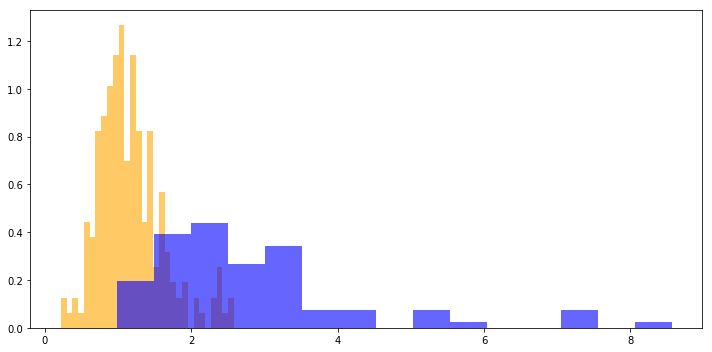

In [18]:
plt.figure(figsize=(10,5))
plt.hist(ratio(rfil.transpose(),'.',',')[0], bins=30, density=True, color='orange', alpha=0.6);
plt.hist(ratio(f.transpose(),'.',',')[0], bins=15, density=True, color='blue', alpha=0.6);
plt.tight_layout()

#### Sammenligning av komma i de to kategoriene. Lettlest har færre komma.

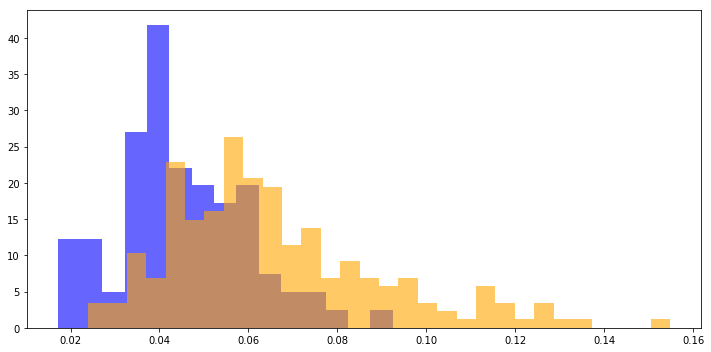

In [19]:
plt.figure(figsize=(10,5))
plt.hist(f.transpose()[','], bins=15, density=True, color='blue', alpha=0.6);
plt.hist(rfil.transpose().dropna()[','], bins=30, density=True, color='orange', alpha = 0.6);
plt.tight_layout()

#### Lettlest har flere punktum.

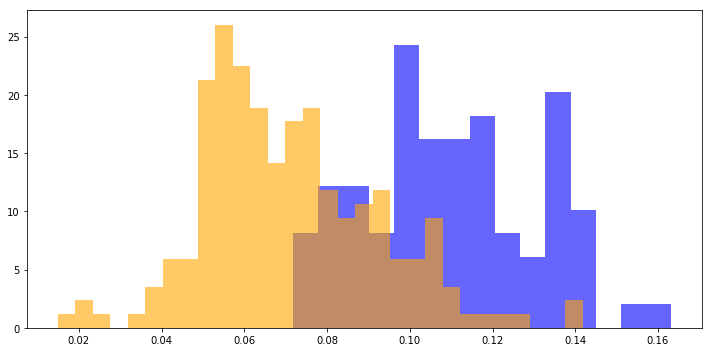

In [20]:
plt.figure(figsize=(10,5))
plt.hist(f.transpose()['.'], bins=15, density=True, color='blue', alpha=0.6);
plt.hist(rfil.transpose().dropna()['.'], bins=30, density=True, color='orange', alpha = 0.6);
plt.tight_layout()

In [26]:
fstat['derfor']

count    81.000000
mean      0.000014
std       0.000091
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       0.000615
Name: derfor, dtype: float64

In [27]:
rfilstat['derfor']

count    200.000000
mean       0.000298
std        0.000400
min        0.000000
25%        0.000000
50%        0.000146
75%        0.000472
max        0.002068
Name: derfor, dtype: float64

#### Argumenterende ord er ikke-eksisterende?

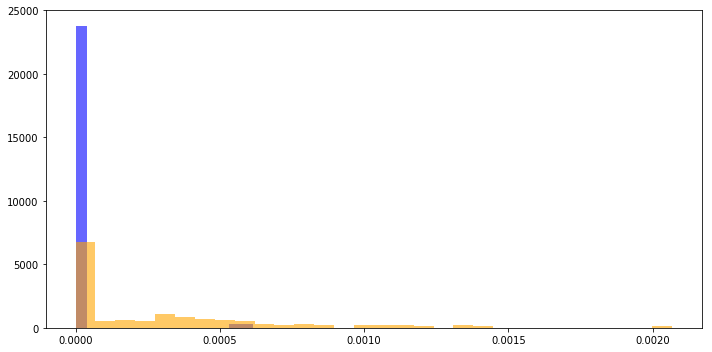

In [28]:
sammenlign(f, rfil, 'derfor')

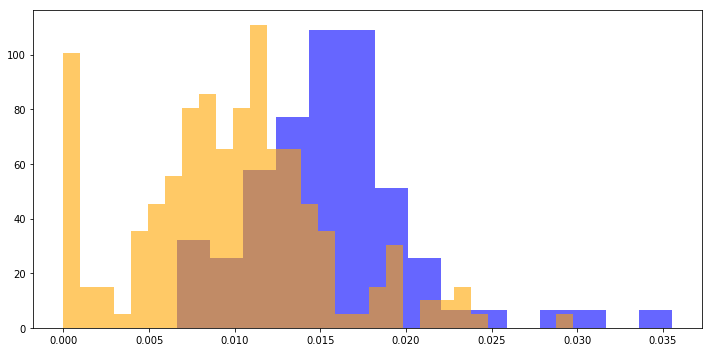

In [31]:
sammenlign(f, rfil, 'ikke')

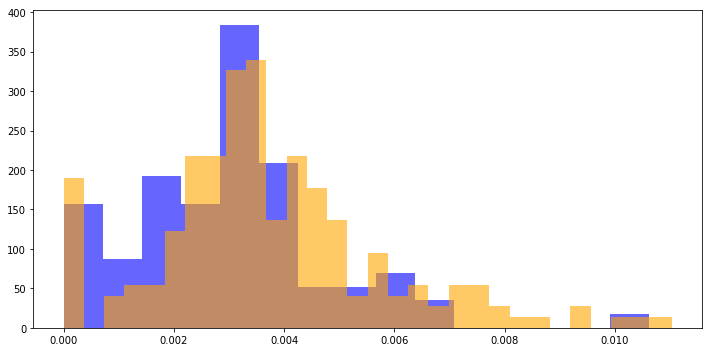

In [32]:
sammenlign(f, rfil, 'men')

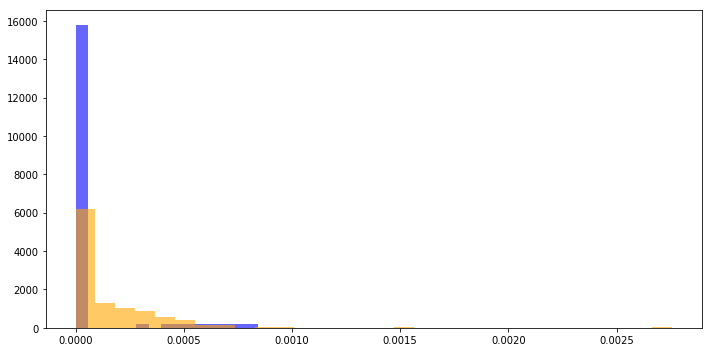

In [35]:
sammenlign(f, rfil, 'hvem')

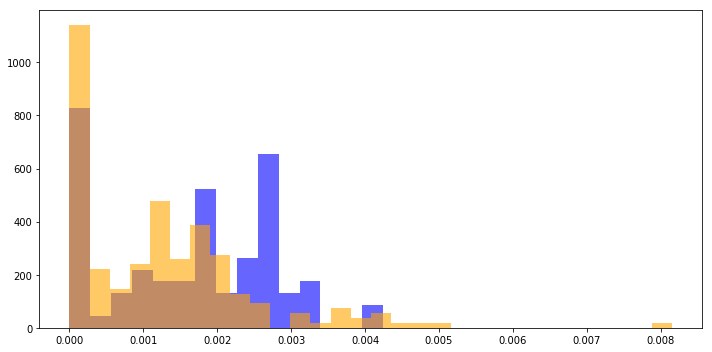

In [36]:
sammenlign(f, rfil, 'hva')

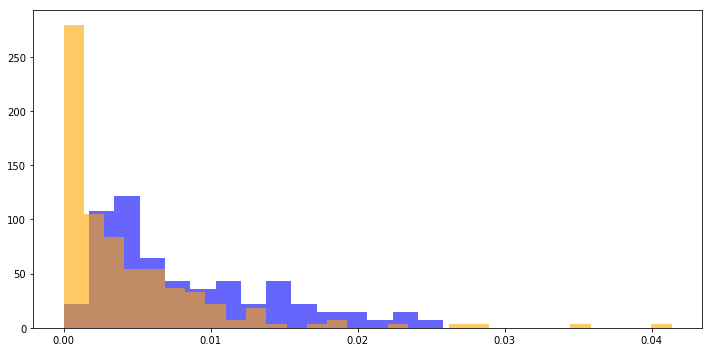

In [37]:
sammenlign(f, rfil, '!')

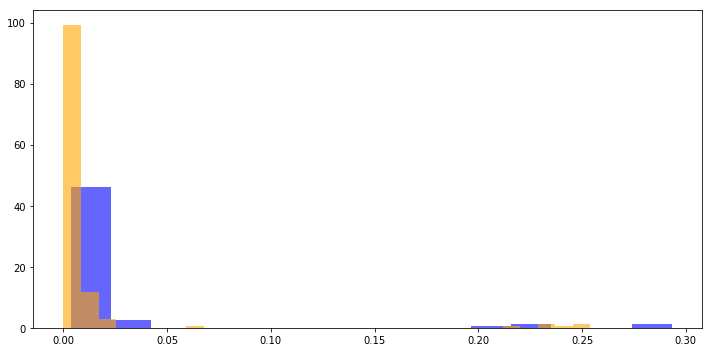

In [38]:
sammenlign(f, rfil, '?')

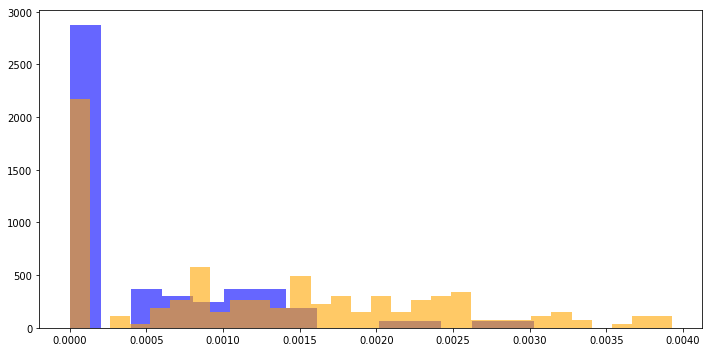

In [47]:
sammenlign(f, rfil, 'denne')

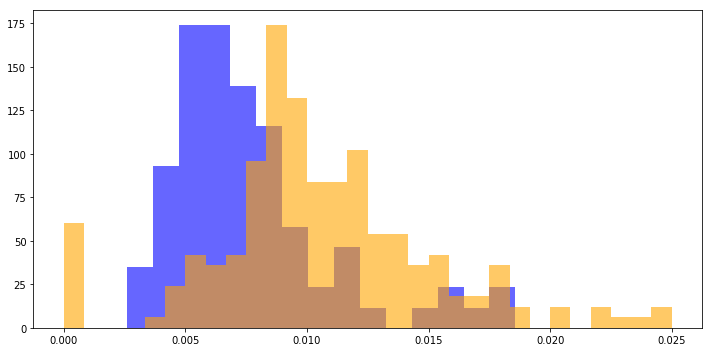

In [19]:
sammenlign(f, rfil, 'den')

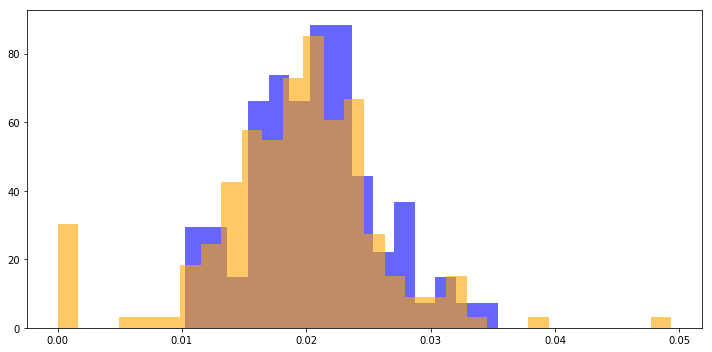

In [20]:
sammenlign(f, rfil, 'det')